<a href="https://colab.research.google.com/github/GAKIZAB/Projet-Machine-learning/blob/main/Pr%C3%A9diction%20et%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Chargement et préparation de données réelles**

In [23]:
# importattion des données
import pandas as pd

data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [24]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [25]:
# Suppression des espaces devant 'shares' et dans le nom de la colonne cible si nécessaire
data.columns = data.columns.str.strip()

In [11]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20531 entries, 0 to 20530
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             20531 non-null  object 
 1    timedelta                      20531 non-null  float64
 2    n_tokens_title                 20531 non-null  float64
 3    n_tokens_content               20531 non-null  float64
 4    n_unique_tokens                20531 non-null  float64
 5    n_non_stop_words               20531 non-null  float64
 6    n_non_stop_unique_tokens       20531 non-null  float64
 7    num_hrefs                      20531 non-null  float64
 8    num_self_hrefs                 20531 non-null  float64
 9    num_imgs                       20531 non-null  float64
 10   num_videos                     20531 non-null  float64
 11   average_token_length           20531 non-null  float64
 12   num_keywords                   

In [12]:
# Desciption des données
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timedelta,20531.0,534.418392,118.184970,326.000000,435.000000,536.000000,638.000000,731.000000
n_tokens_title,20531.0,9.957187,1.985154,2.000000,9.000000,10.000000,11.000000,19.000000
n_tokens_content,20531.0,522.384053,448.842438,0.000000,234.000000,384.000000,672.000000,7081.000000
n_unique_tokens,20531.0,0.554256,0.117062,0.000000,0.483536,0.555118,0.626483,1.000000
n_non_stop_words,20531.0,0.992158,0.088208,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,20531.0,0.697229,0.120432,0.000000,0.637639,0.702703,0.768293,1.000000
num_hrefs,20531.0,11.140617,11.054849,0.000000,5.000000,8.000000,14.000000,187.000000
num_self_hrefs,20531.0,3.597584,4.385854,0.000000,1.000000,3.000000,4.000000,74.000000
num_imgs,20531.0,4.385661,8.458127,0.000000,1.000000,1.000000,3.000000,128.000000
num_videos,20531.0,1.245336,4.388874,0.000000,0.000000,0.000000,1.000000,91.000000


In [27]:
data.drop(['url', 'timedelta'], axis=1, inplace=True)

In [28]:
# Description de la variable cible
data['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [32]:
# Lien entre la variable cible et les autres variables
correlations = data.corr()['shares'].sort_values(ascending=False)[1:]
correlations

,shares
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686
kw_min_avg,0.039551
num_imgs,0.039388


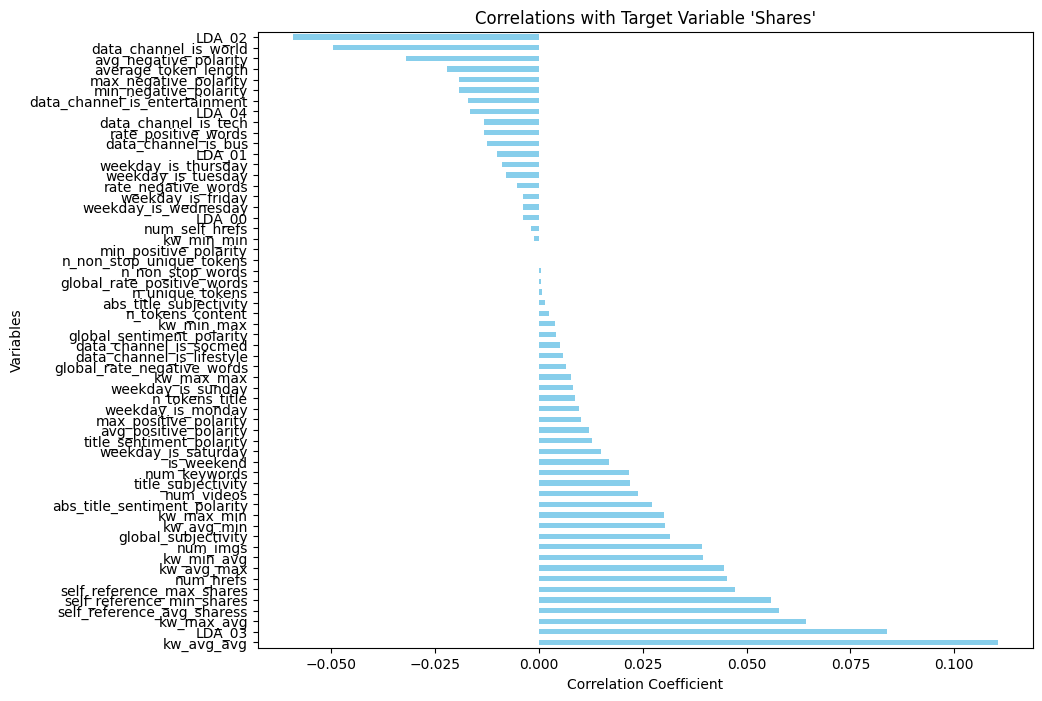

In [33]:
import matplotlib.pyplot as plt

# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='skyblue')
plt.title("Correlations with Target Variable 'Shares'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()


# 2.   **Prédiction**



## a. Random Forest sans diminution de dimension

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


In [60]:
X = data.drop('shares', axis=1)
y = data['shares']

# Séparation en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Prédiction
y_pred_rf = random_forest.predict(X_test)

In [61]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

174861747.7589204

In [62]:
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf

-0.015121184451478253

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [10, 20, None],      # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]     # Nombre minimum d'échantillons pour un nœud feuille
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Minimise MSE
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres:", best_params)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
# Entraîner le modèle avec les meilleurs paramètres
optimized_rf = RandomForestRegressor(**best_params, random_state=42)
optimized_rf.fit(X_train, y_train)

# Prédiction
y_pred_optimized_rf = optimized_rf.predict(X_test)

# Calcul du MSE et du R²
mse = mean_squared_error(y_test, y_pred_optimized_rf)
r2 = r2_score(y_test, y_pred_optimized_rf)
print(f"MSE (Optimized Random Forest) : {mse}")
print(f"R² (Optimized Random Forest) : {r2}")

# Affichage des performances
print("\nPerformance sur l'ensemble de test:")
print("Mean Squared Error (MSE) :", mse)
print("Coefficient de Détermination (R²) :", r2)

## b. Random Forest + ACP

In [63]:
from sklearn.decomposition import PCA
# Appliquer l'ACP pour réduire la dimensionnalité
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

random_forest_pca = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_pca.fit(X_train_pca, y_train)

# Prédiction
y_pred_rf_pca = random_forest_pca.predict(X_test_pca)

In [64]:
mse_rf_pca = mean_squared_error(y_test, y_pred_rf_pca)
r2_rf_umap = r2_score(y_test, y_pred_rf_pca)
mse_rf_pca
r2_rf_umap

-0.027047869473466157

In [65]:
import umap
# Appliquer UMAP pour réduire la dimensionnalité des données
umap_reducer = umap.UMAP(n_components=10, random_state=42)  # Choisissez le nombre de composantes
X_train_umap = umap_reducer.fit_transform(X_train)
X_test_umap = umap_reducer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [66]:
# Entraîner la Forêt Aléatoire sur les données réduites
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_umap, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Prédiction et évaluation
y_pred_rf_umap = random_forest.predict(X_test_umap)
mse_rf_umap = mean_squared_error(y_test, y_pred_rf_umap)
r2_rf_umap = r2_score(y_test, y_pred_rf_umap)

In [52]:
print(f"Mean Squared Error (MSE) sur l'ensemble de test : {mse}")
print(f"R² score sur l'ensemble de test : {r2}")

Mean Squared Error (MSE) sur l'ensemble de test : 196518161.9628903
R² score sur l'ensemble de test : -0.14084270513543395


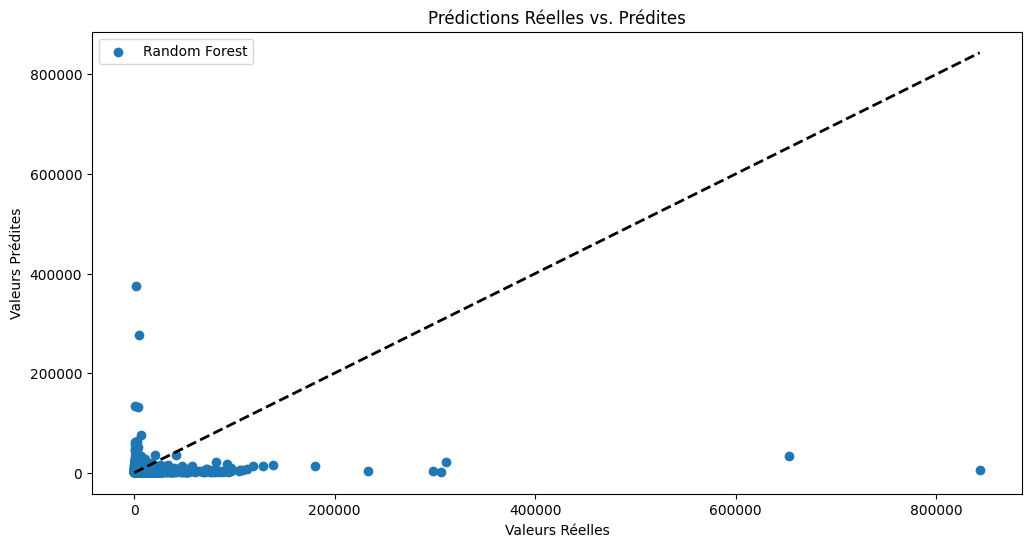

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Exemple pour le Random Forest sans réduction de dimension
plt.scatter(y_test, y_pred_rf, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Prédictions Réelles vs. Prédites")
plt.legend()
plt.show()


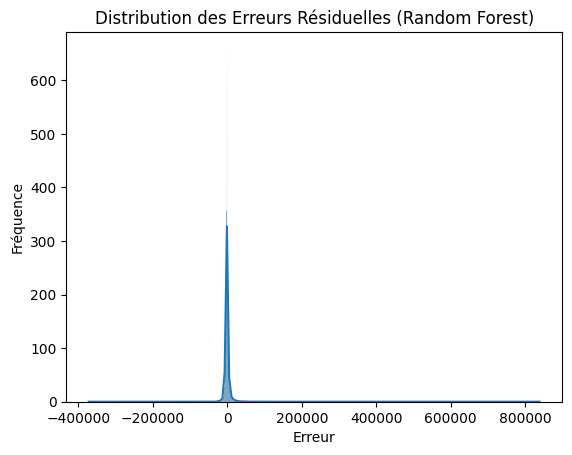

In [54]:
import seaborn as sns

residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True)
plt.title("Distribution des Erreurs Résiduelles (Random Forest)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (58,) and arg 1 with shape (10,).

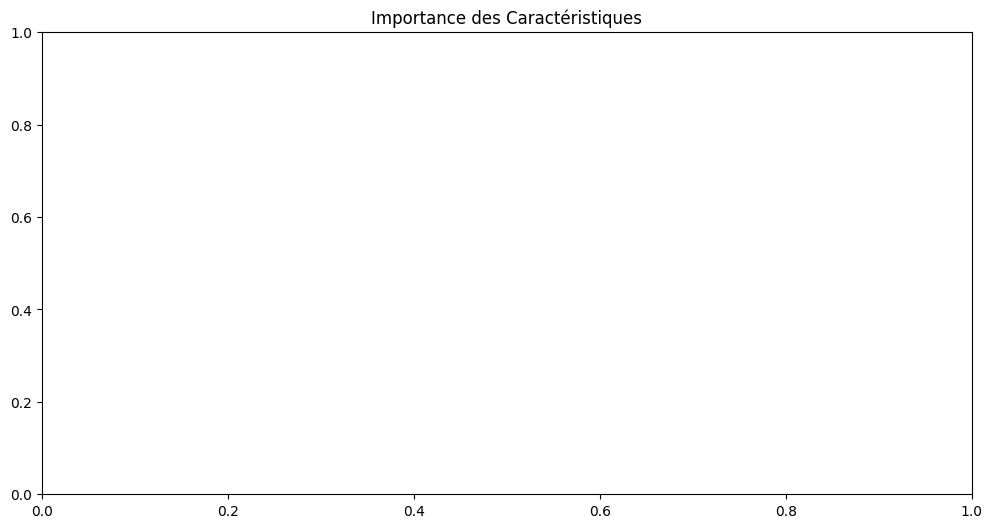

In [55]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des Caractéristiques")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()


In [58]:
import pandas as pd

results = {
    'Modèle': ['Random Forest', 'Random Forest + ACP', 'Random Forest + UMAP'],
    'MSE': [mse_rf, mse_rf_pca, mse_rf_umap],
    'R²': [r2_rf, r2_rf_pca, r2_rf_umap]
}

results_df = pd.DataFrame(results)
print(results_df)


NameError: name 'r2_rf_pca' is not defined